# 7. Demonstration: Machine Learning for City Dashboard

## 2.	Feature selection method and Extraction.

1. Environment related any attributes :use of Solar Panels made in Edmonton
2. Employment :Unemployment rate 

3. Healthy package:impaired driving incidences

4. More advanced in innovation related any attributes:CMA-labor force growth
5. Governance related any dominant attributes:Governance
  

## Importing the packages

In [21]:

import numpy as np                   # for multi-dimensional containers
import pandas as pd                  # for DataFrames
import crayons as cr

from tabulate import tabulate

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns

from sklearn import linear_model 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix



sns.set(style="white", color_codes=True)
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")



## Loading the dataset

In [54]:
df= pd.read_excel("data.xlsx")
df.head()

,UNEMPLOYMENT_RATE,National_Unemployment_Rate,Impaired Driving Incidents,90_RIGHT_ENERGY,Edmonton CMA - Working Age Population Growth,Edmonton CMA - Labour Force Growth,Edmonton CMA - Employment Growth,governance
0,7.1,8.4,454.0,895.67,1.8,1.3,-1.6,1
1,7.2,8.4,517.0,875.08,1.7,0.4,-1.9,0
2,7.5,8.3,468.0,1077.25,1.6,-0.7,-3.1,0
3,7.7,8.3,632.0,824.25,1.6,-0.4,-2.9,0
4,7.4,8.2,464.0,1197.25,1.5,-0.2,-0.7,1


In [4]:
df.keys()

Index(['UNEMPLOYMENT_RATE', 'National_Unemployment_Rate',
       'Impaired Driving Incidents', '90_RIGHT_ENERGY',
       'Edmonton CMA - Working Age Population Growth',
       'Edmonton CMA - Labour Force Growth',
       'Edmonton CMA - Employment Growth', 'governance'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UNEMPLOYMENT_RATE                             153 non-null    float64
 1   National_Unemployment_Rate                    153 non-null    float64
 2   Impaired Driving Incidents                    43 non-null     float64
 3   90_RIGHT_ENERGY                               387 non-null    float64
 4   Edmonton CMA - Working Age Population Growth  98 non-null     float64
 5   Edmonton CMA - Labour Force Growth            98 non-null     float64
 6   Edmonton CMA - Employment Growth              98 non-null     float64
 7   governance                                    1158 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 72.5 KB


## 3.Data visulalization and analysis ( based on dataset types)

## Exploratory analysis

### Summary statistics

In [11]:
df.describe()

,UNEMPLOYMENT_RATE,National_Unemployment_Rate,Impaired Driving Incidents,90_RIGHT_ENERGY,Edmonton CMA - Working Age Population Growth,Edmonton CMA - Labour Force Growth,Edmonton CMA - Employment Growth,governance
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,5.546512,7.613953,443.139535,971.543256,2.218605,2.344186,2.983721,0.372093
std,1.020352,0.381464,93.738385,254.800702,0.858364,2.092083,2.720113,0.489083
min,4.200000,7.100000,283.000000,461.170000,1.400000,-2.000000,-3.100000,0.000000
25%,4.700000,7.300000,376.500000,804.960000,1.500000,1.100000,1.800000,0.000000
50%,5.300000,7.500000,447.000000,914.920000,1.800000,2.800000,3.700000,0.000000
75%,6.100000,7.900000,496.000000,1174.750000,2.850000,3.300000,4.500000,1.000000
max,7.700000,8.400000,670.000000,1399.920000,4.000000,6.200000,7.600000,1.000000


### Popularity of good governace accross the unemployment rate 

<AxesSubplot: xlabel='governance', ylabel='UNEMPLOYMENT_RATE'>

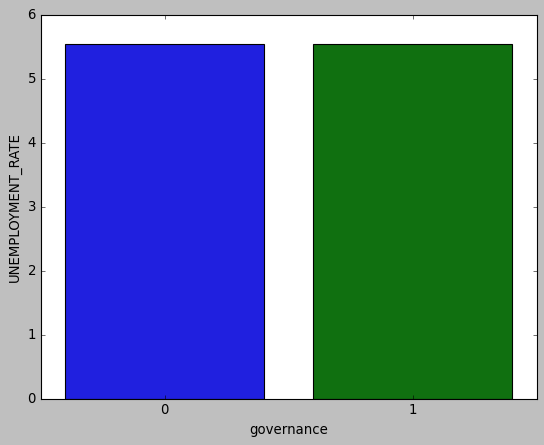

In [13]:
sns.barplot(data = df
            ,x = 'governance'
            ,y = 'UNEMPLOYMENT_RATE'
             
            ,errorbar=None
            )

Good governance is a key stimulator of  economic growth which is directed infulencing the rate of emplyament, inflation  rate and gdp of a geopolitical region. For Edmonton, the rate of unemplyment is uniform across the population that feels that the governance is not not done correctly and those that feel that it is on the right direction. 

## Assessing presence of extreme values and equal variance

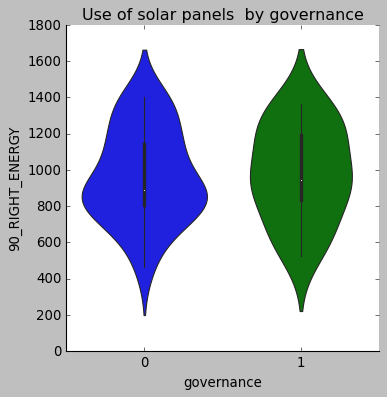

In [14]:
sns.catplot(data=df, x="governance", y="90_RIGHT_ENERGY", kind="violin").set(title='Use of solar panels  by governance')

there is no presence of extreme values across two groups ,that is, those that think the government of Edmonton is in good direction or good governance and those having contrary opinion.
Generally, there is no variation in use of solar panels accross the divide. This means that both groups convserve the environment. 

### Normality using Histogram

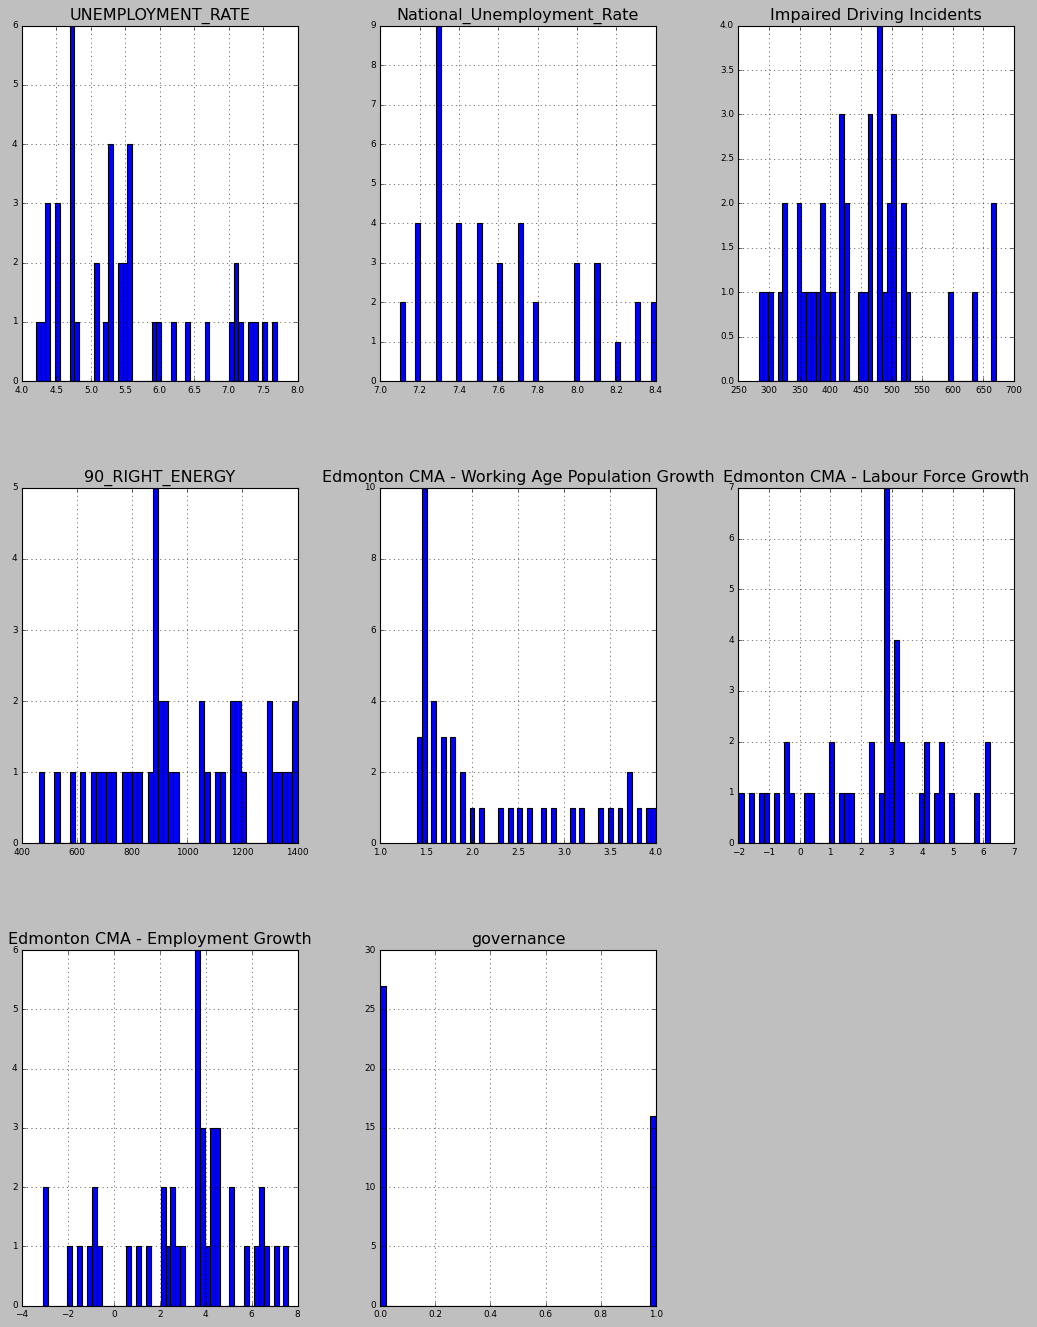

In [15]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations


The results shows that the assumption of normality is violated accross all the variables as the shape of the histograms can be estimated to be bell-shaped. 

## 4.Data evaluation like cleansing and transforming  

## Dealing with missing values

In [60]:
df.isnull().sum()

UNEMPLOYMENT_RATE                               1005
National_Unemployment_Rate                      1005
Impaired Driving Incidents                      1115
90_RIGHT_ENERGY                                  771
Edmonton CMA - Working Age Population Growth    1060
Edmonton CMA - Labour Force Growth              1060
Edmonton CMA - Employment Growth                1060
governance                                         0
dtype: int64

In [61]:
df=df.dropna()

In [62]:
df.isnull().sum()

UNEMPLOYMENT_RATE                               0
National_Unemployment_Rate                      0
Impaired Driving Incidents                      0
90_RIGHT_ENERGY                                 0
Edmonton CMA - Working Age Population Growth    0
Edmonton CMA - Labour Force Growth              0
Edmonton CMA - Employment Growth                0
governance                                      0
dtype: int64

The dataset had several missing values across all the variables. The missing values were dropped as their was no bettter alternative that could be deployed and the sample size was large enough.

### Split the values into x and y

In [74]:
from sklearn import preprocessing
from sklearn import utils


X = df.iloc[:, :-1].values    #   X -> Feature Variables
y = df.iloc[:, -1].values #   y ->  Target




### Splitting the data into Train and Test

In [66]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Standardize features by removing mean and scaling to unit variance:

In [67]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

## 5. Type of machine learning algorithms

***
### Type of Machine learning algorithms

Since the target variable governance is binary in nature, the suitable machine leraning algorithm is classification.

The act of identifying, comprehending, and organizing concepts and objects into predetermined categories or "sub-populations" is the process that is referred to as classification. Machine learning systems utilize a variety of methods to classify future datasets into categories. These algorithms are trained using datasets that have already been categorized.

In the field of machine learning, classification algorithms make use of input training data to make predictions about the likelihood that subsequent data will fall into one of the established categories. In this situation, we will evaluate the quality of governance in Edmonton based on a number of additional criteria to determine whether it is good or terrible.

The algorithms that will be used include;

1. Logistic Regression
2. Support Vector Machine's
3. Decision Tree
4. Naive Bayes

### **Evaluation Metrics**

We will evaluate the performance of the model using two metrics - Confusion matrix and accuracy.

A confusion matrix, also known as an error matrix, is a special table structure that permits visualization of the performance of an algorithm, typically a supervised learning one. It is used in the field of machine learning, and more specifically, the problem of statistical classification (in unsupervised learning it is usually called a matching matrix). While each row of the matrix represents the cases that belong to an actual class, each column of the matrix represents the instances that belong to a predicted class, or vice versa — the literature refers to both of these permutations.  The origin of the name comes from the fact that it is simple to determine whether or not the system is mixing together two different classifications (i.e. commonly mislabeling one as another).
It is a specialized form of the contingency table that has two dimensions (called "actual" and "predicted") with identical sets of "classes" in both dimensions (each combination of dimension and class is a variable in the contingency table).

Accuracy: 
The term "accuracy" refers to the degree to which a binary classification test correctly detects or eliminates a condition from consideration. Accuracy is measured statistically. In other words, accuracy refers to the proportion of right predictions (including both true positives and true negatives) made out of the total number of cases that were investigated. As such, it evaluates the differences between the pre-test and post-test probabilities. It is frequently referred to as the "Rand accuracy" or the "Rand index" in order to make the semantics of the context more obvious. It is something that the test uses as a parameter. The following formula can be used to quantify the correctness of binary data:


$$Accuracy=\frac{TP+TN}{TP+TN+FP+FN}$$

where TP = True positive; FP = False positive; TN = True negative; FN = False negative

Ideally, higher accuracy  values are indicative of a good model.


## 6. Data Modelling 

- Step 1 - Loading the required libraries and modules.

- Step 2 - Loading the data and performing basic data checks.

- Step 3 - Creating arrays for the features and the response variable.

- Step 4 - Creating the training and test datasets.

- Step 5 - Build, Predict and Evaluate the regression model. We will be repeating Step 5 for the various regression models.

## 7. Building the models

### Logistics Regression

In [77]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.20      0.25      0.22         4

    accuracy                           0.46        13
   macro avg       0.41      0.40      0.41        13
weighted avg       0.49      0.46      0.48        13

[[5 4]
 [3 1]]
accuracy is 0.46153846153846156


### Support vector Machine's

In [84]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       0.00      0.00      0.00         4

    accuracy                           0.69        13
   macro avg       0.35      0.50      0.41        13
weighted avg       0.48      0.69      0.57        13

[[9 0]
 [4 0]]
accuracy is 0.6923076923076923


### Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.33      0.50      0.40         4

    accuracy                           0.54        13
   macro avg       0.52      0.53      0.51        13
weighted avg       0.60      0.54      0.56        13

[[5 4]
 [2 2]]
accuracy is 0.5384615384615384


### Bernouli Naive Bayes

In [80]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       0.00      0.00      0.00         4

    accuracy                           0.69        13
   macro avg       0.35      0.50      0.41        13
weighted avg       0.48      0.69      0.57        13

[[9 0]
 [4 0]]
accuracy is 0.6923076923076923


## 8. Analyzing the model built

- Logistics Regression has an accuracy of 0.46 which is low and below average hence the performance is considered below average or rather not a good model.
- Support Vector machine's (svm) has an accuracy of 70 which is above average and the model performance is considered high or rather a good model.
- Decision tree has an accuracy of 53 which is above average and the model performance is considered average or rather a good model.
- Lastly, Naive Bayes has an accuracy of  70 which is above average and the model performance is considered high or rather a good model.

### 9. Model Evaluation

In [85]:
from sklearn.metrics import accuracy_score, log_loss   
classifiers = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        BernoulliNB(),
        SVC(),               
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

LogisticRegression
****Results****
Accuracy: 46.1538%
DecisionTreeClassifier
****Results****
Accuracy: 53.8462%
BernoulliNB
****Results****
Accuracy: 69.2308%
SVC
****Results****
Accuracy: 69.2308%


### 10.	Accuracy result comparison

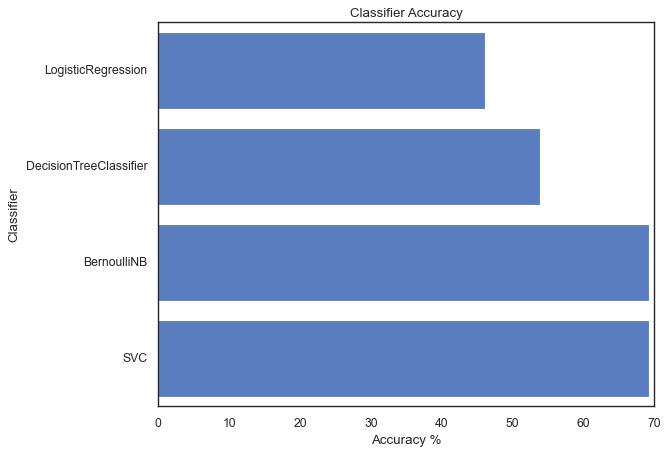

In [86]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

The best models for categorizing governance of Edmonton is using SVC or Bernouli Naive Bayes as they have high performance of an accuracy of 70 % while the rest of the models are average. 